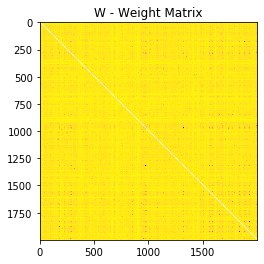

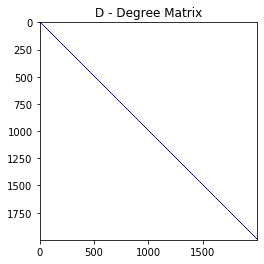

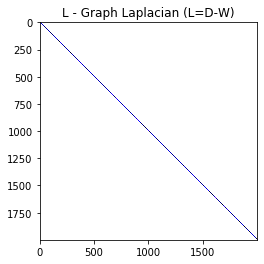

In [21]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd
from matplotlib import pyplot as plt

########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
k=20

#Functions 
def similarity(x,y):
    return 1000/(linalg.norm((x-y),2))
    #return linalg.norm(np.multiply(x,y), ord=0)
data = pd.read_csv("DataSets/MINST.txt", header=None, delim_whitespace=True)
x_list = []
for i, row in data.iterrows():
    x_list.append(np.array(row))

L,W,D = scplot.createMatrices(x_list[0:2000], similarity)
#L,W,D,cutoff = scplot.convertToEpsilonNeighborhoodGraphByPercentile(W, .1)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L,D)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])

# plot output
#print("Output of KMeans Clustering")
#display(km.cluster_centers_)
#display(km.labels_)

########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').count().reset_index()


#print("Cluster counts and Ranges:")
#display(data_cluster_result)
    
imdict = {}
i = -1;
for l in km.labels_:
    i+=1
    if l not in imdict.keys():
        imdict[l] = [x_list[i]]
    else:
        imdict[l].append(x_list[i])
    
#print(len(km.labels_))
#print(km.labels_)

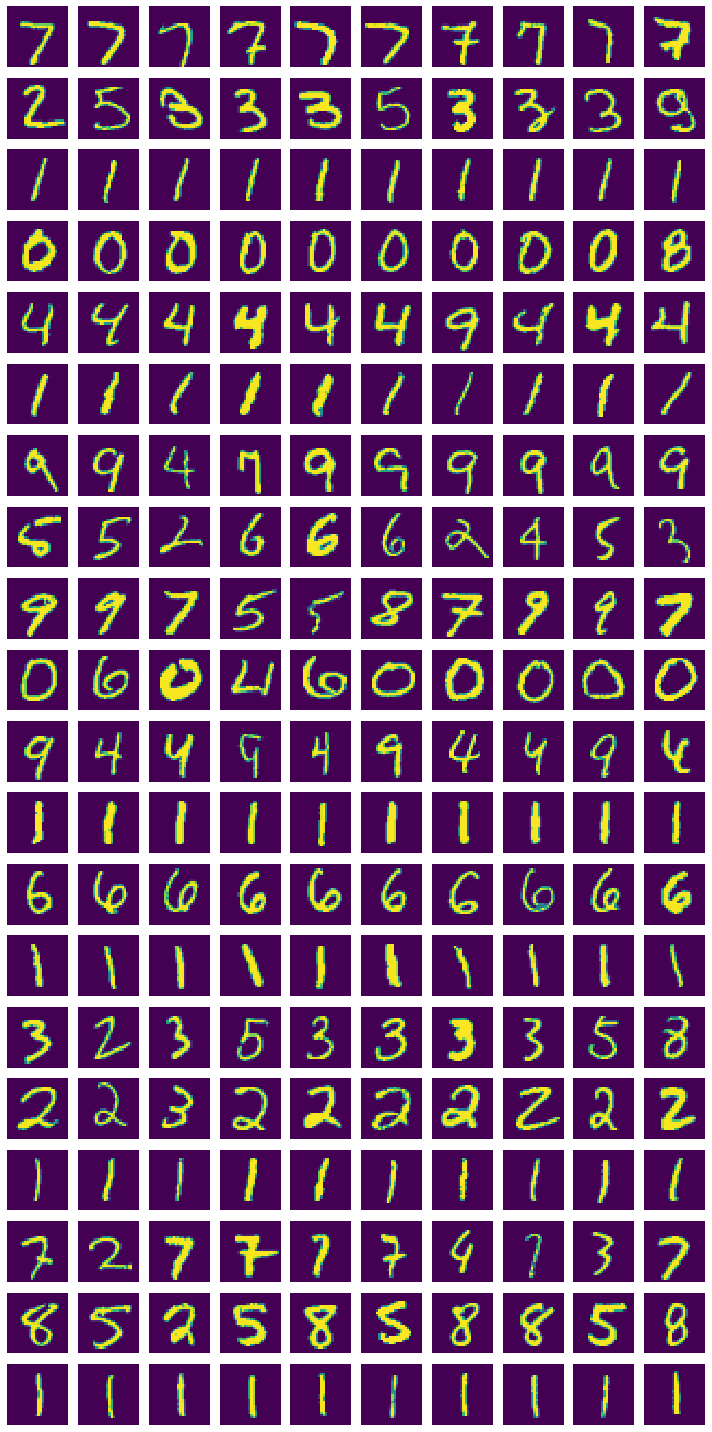

In [22]:
fig, ax = plt.subplots(len(imdict.keys()),10, figsize=(10,20))
fig.subplots_adjust(hspace=0, wspace=0) 
r = -1
for k in imdict.keys():
    r += 1
    for a in range(0,min(10,len(imdict[k]))):
        ax[r,a].imshow(imdict[k][a].reshape((28, 28)))
        ax[r,a].set_axis_off()
plt.tight_layout()
plt.show()
fig.savefig("number_clustering_2.png")
plt.close()

Interesting observation:

also affected by number of eigen vectors chosen similar to un-normalized variant.

In [2]:
pd.DataFrame(D).to_csv("D3.csv")

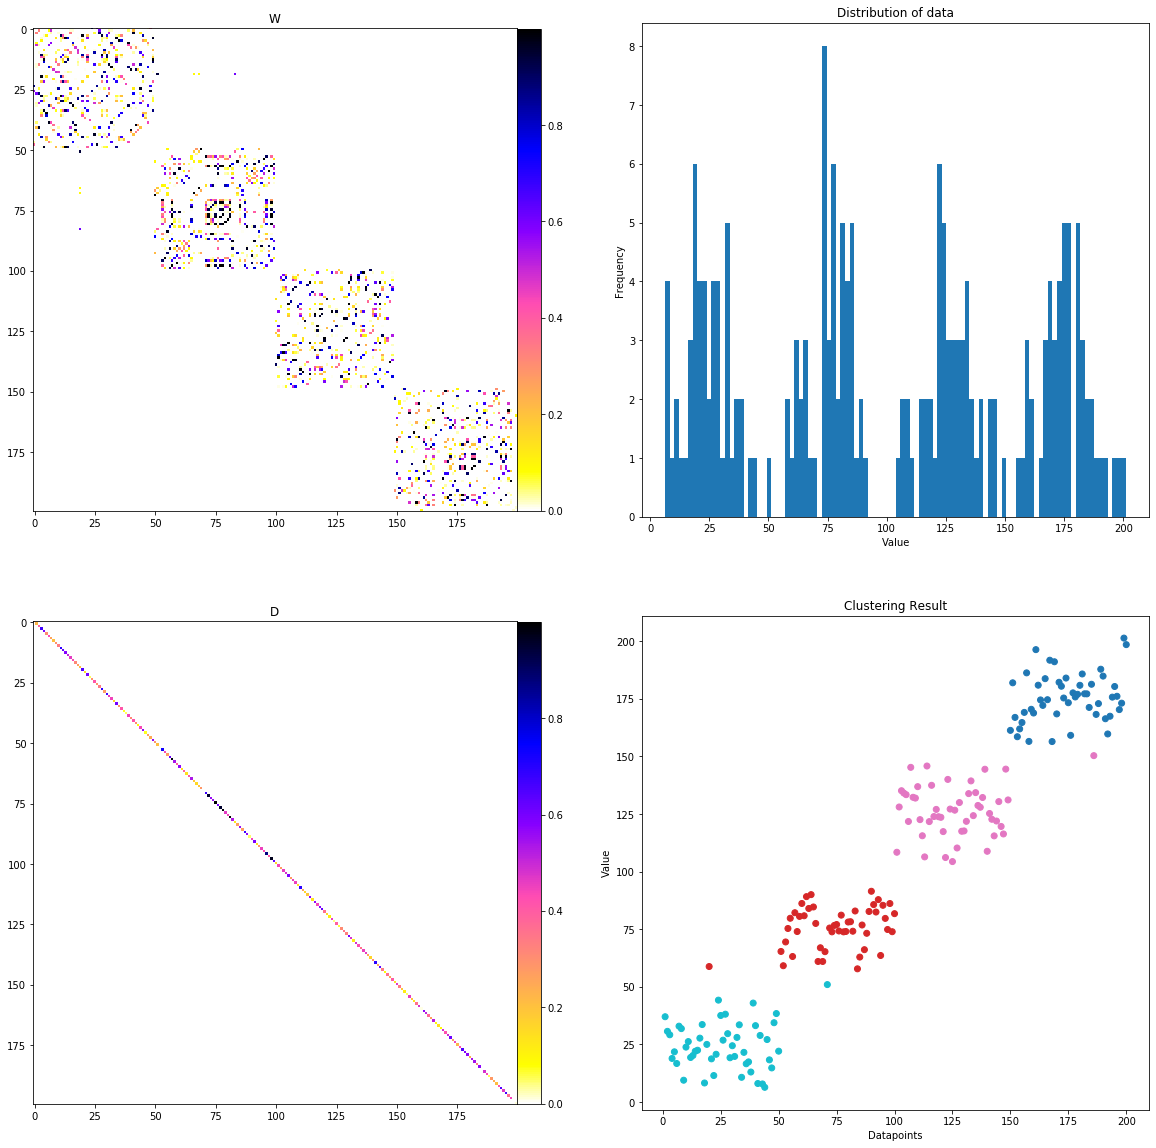

In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

figure = plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
im=plt.imshow(W, cmap=plt.cm.gnuplot2.reversed())
plt.title("W")
plt.colorbar(im, fraction=0.0475, pad=0.0)
plt.gca().xaxis.tick_bottom()

plt.subplot(2,2,3)
plt.imshow(D, cmap=plt.cm.gnuplot2.reversed())
plt.title("D")
plt.gca().xaxis.tick_bottom()
plt.colorbar(im, fraction=0.0475, pad=0.0)

plt.subplot(2,2,2)
plt.hist(x_list, bins=100)
plt.title("Distribution of data")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
data = x_list
groups = km.labels_
if len(data.shape) ==1 :
    plt.scatter(range(1,len(data)+1),data,c=groups, cmap='tab10') 
else:
    plt.scatter(data[:,0],data[:,1],c=groups, cmap='tab10')
plt.title("Clustering Result")
plt.xlabel("Datapoints")
plt.ylabel("Value")
plt.show()
figure.savefig("1DCluster.jpg")
plt.close()
